In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from dimod import SimulatedAnnealingSampler

In [2]:
N = 6
np.random.seed(1)
x = 2 * np.random.rand(N,1)
y = np.random.rand(N,1)

In [3]:
class tsp_solver:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
        self.N = len(x)
        X, Y = np.meshgrid(np.arange(N), np.arange(N))
        self.dist = np.hypot(x[X] - x[Y], y[X] - y[Y]).squeeze()

    def get_matrix(self, alpha = 100, beta = 100):
        b = np.ones(self.N)

        A = np.kron(np.eye(self.N), b)
        AtA_1 = np.matmul(A.T, A)
        diag_1 = np.diag(2*b.T@A)    

        A2 = np.kron(b, np.eye(self.N))
        AtA_2 = np.matmul(A2.T, A2)
        diag_2 = np.diag(2*b.T@A2)

        constr = alpha*(AtA_1 - diag_1) + beta*(AtA_2 - diag_2)

        UD = np.diag(np.ones(self.N-1), k=1)
        E = np.zeros((self.N, self.N))
        E[N-1, 0] = 1

        # Create dist(i, j) on the diagonal near main and in the bottom-left corner of each block
        Q = np.kron(self.dist, UD + E)

        self.QUBO_matrix = Q + constr

        return self.QUBO_matrix
    
    def show_points(self):
        for i in range(self.N):
            name = chr(ord('A')+i)
            plt.plot(self.x[i], self.y[i], marker='o',markersize=16)
            plt.annotate(name, (x[i],y[i]), ha='center', va='center')

    def brute_force_solve(self):
        res = float('inf')
        self.v_ans = []
        prob_1 = np.around(1/self.N, 3)
        for i in range(300000):
            v = np.random.choice([0, 1], size=(self.N*self.N), p=[1 - prob_1, prob_1])
            val = v.T@self.QUBO_matrix@v
            if val < res:
                res = val
                self.v_ans = v
        return self.v_ans, res
    
    def show_res(self):
        self.show_points()
        result_output = self.v_ans.reshape((self.N, self.N))
        inds = (result_output!=0).argmax(axis=0)
        for i in range(self.N-1):
            plt.plot([x[inds[i]],x[inds[i+1]]] , [y[inds[i]],y[inds[i+1]]] , zorder = 10, linewidth = 3, linestyle = 'dashed')
        plt.plot([x[inds[self.N-1]],x[inds[0]]] , [y[inds[self.N-1]],y[inds[0]]] , zorder = 10, linewidth = 3, linestyle = 'dashed')
        

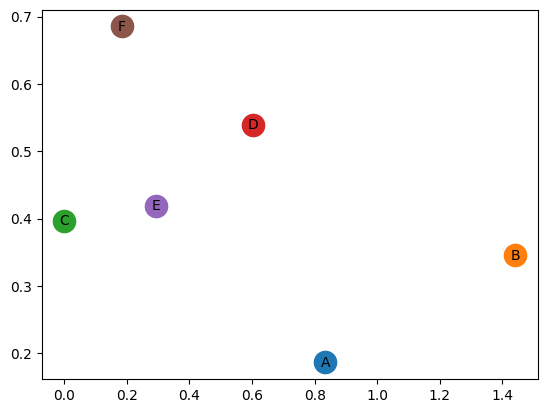

In [4]:
tsp = tsp_solver(x, y)
tsp.show_points()
QUBO_matrix = tsp.get_matrix(5, 5)

In [5]:
np.savetxt("file1.txt", QUBO_matrix, fmt='%.2e')

-56.84491445823668 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]


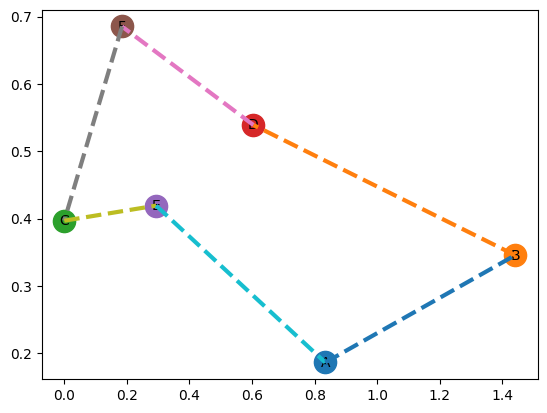

In [6]:
v_ans, res = tsp.brute_force_solve()
print(res, v_ans)
tsp.show_res()